In [1]:
import pandas as pd
import numpy as np

In [6]:
posts = pd.concat((pd.read_csv('posts_0-2000.csv'), pd.read_csv('posts_2000-7000.csv')), axis=0)
posts.head()

((7000, 7),
         id  owner_id        date  views  likes  reposts  \
 0  5187887 -26284064  1685067315   7957     18        1   
 1  5188835 -26284064  1685102438   1341      9        2   
 2  5188834 -26284064  1685102404   1231      0        1   
 3  5188795 -26284064  1685101512   3749     15        8   
 4  5188775 -26284064  1685100610   4890     40        4   
 
                                                 text  
 0  Основные события специальной военной операции ...  
 1  Владимир Путин проводит встречу с членами обще...  
 2  Год назад председатель комитета Госдумы по меж...  
 3  Причиной инцидента на Морской улице в Краснода...  
 4  Минкультуры сообщило, что "Троицу" Андрея Рубл...  )

In [7]:
comments = pd.concat((pd.read_csv('comments_0-2000.csv'), pd.read_csv('comments_2000-7000.csv')), axis=0)
comments.head()

,id,post_id,from_id,date,likes,reply_to_comment,text
0,5188043,5187887,0,1685077700,0,NaN,NaN
1,5188229,5187887,801731288,1685085644,0,NaN,ну вот и очередной теракт Украина провела. ясм...
2,5188483,5187887,690352028,1685093934,0,NaN,Этой ночью наши войска хорошенько прошлись по ...
3,5188843,5188835,704410107,1685102649,0,NaN,NaN
4,5188857,5188835,804081222,1685103137,0,NaN,Сборище воров и преступников


In [8]:
posts.shape, comments.shape

((7000, 7), (76876, 7))

In [9]:
from matplotlib import pyplot as plt

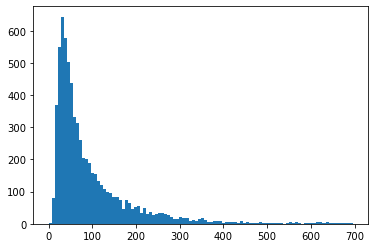

In [20]:
plt.hist(posts.likes[posts.likes < 700], bins=100)
plt.show()

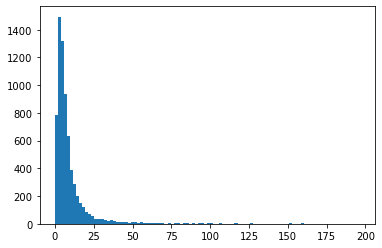

In [23]:
plt.hist(posts.reposts[posts.reposts < 200], bins=100)
plt.show()

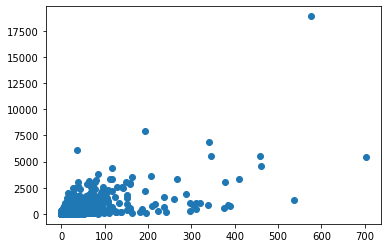

In [25]:
plt.scatter(posts.reposts, posts.likes)
plt.show()

In [164]:
post_likes_reposts = posts[['likes', 'reposts']].to_numpy()

In [165]:
plr_cos = np.array([[np.arccos(p[0] / (p[0] ** 2 + p[1] ** 2) ** 0.5), (p[0] ** 2 + p[1] ** 2) ** 0.5] for p in post_likes_reposts])

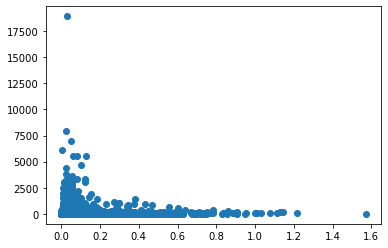

In [166]:
plt.scatter(*plr_cos.T)
plt.show()

In [172]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster_res = cluster.fit_predict(plr_cos)

In [173]:
max(cluster_res)

2

In [174]:
import random

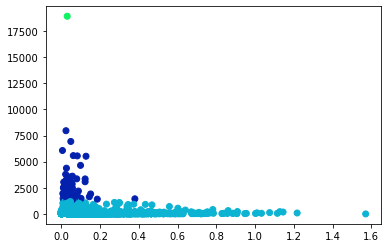

In [175]:
random_colors = [f'#{hex(random.randint(0, 1677215))[2:].rjust(6, "0")}' for _ in range(max(cluster_res) + 1)]
plt.scatter(*plr_cos.T, c=[random_colors[i] for i in cluster_res])
plt.show()

In [177]:
posts.iloc[[i for i, cl in enumerate(cluster_res) if cl == 1]].to_csv('cl2.csv')

In [ ]:
import nltk

